In [20]:
import pandas as pd  
import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import scikitplot as skplt

import sys
sys.path.append('../../data/')
import cleaner as dc

In [15]:
df = pd.read_csv('data/persuasion_dataset.csv') 
df.shape

(13114, 2)

In [16]:
# Lower case
df['ad']= df['ad'].apply(lambda x: x.lower())

# Removing punctuations
df['ad']= df['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df['ad']= df['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df['ad']= df['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df['ad']= df['ad'].apply(dc.denoise_text)

##Remove stopwords 
df['ad']= df['ad'].apply(dc.remove_stopwords)

#Remove special characters
df['ad']= df['ad'].apply(dc.remove_special_characters)

#Simple stemming 
df['lemmatized']= df['ad'].apply(dc.simple_lemmatizer)

In [17]:
X_train, X_test,  y_train, y_test= train_test_split(df['lemmatized'], df['label'], test_size =0.2, random_state=42)

In [18]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [21]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)


MultinomialNB()

accuracy:   0.921
                precision    recall  f1-score   support

non-persuasive       0.99      0.86      0.92      1314
    persuasive       0.87      0.99      0.93      1309

      accuracy                           0.92      2623
     macro avg       0.93      0.92      0.92      2623
  weighted avg       0.93      0.92      0.92      2623

confusion matrix:
[[1124  190]
 [  17 1292]]



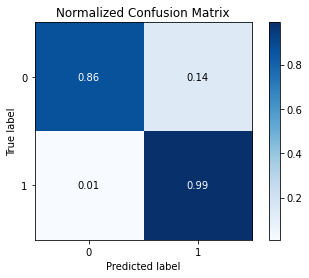

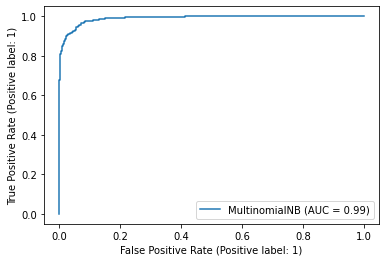

In [22]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['non-persuasive', 'persuasive']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [23]:
df_val=pd.read_csv("data/sample_persuasion.csv")

# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_val['ad']= df_val['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

#Remove stopwords
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Remove special characters
df_val['ad']= df_val['ad'].apply(dc.remove_special_characters)

#Simple stemming 
df_val['lemmatized']= df_val['ad'].apply(dc.simple_lemmatizer)

accuracy:   0.743
               precision    recall  f1-score   support

no-persuasive       1.00      0.11      0.20        92
   persuasive       0.73      1.00      0.85       227

     accuracy                           0.74       319
    macro avg       0.87      0.55      0.52       319
 weighted avg       0.81      0.74      0.66       319

confusion matrix:
[[ 10  82]
 [  0 227]]



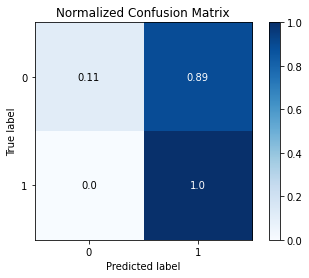

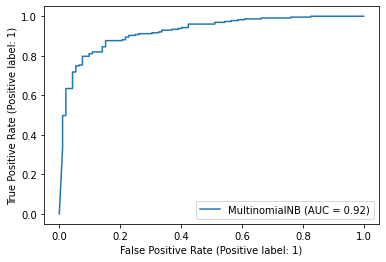

In [24]:
X_val = tf_vectorizer.transform(df_val['lemmatized'])
y_val = df_val['label']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-persuasive', 'persuasive']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)